# Read in the data from Charles El Mir and output to "raw"

*The data are from [this article](https://www.sciencedirect.com/science/article/pii/S001910351830349X?via%3Dihub).*

*I will have to downsample considerably...*


In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import os
import csv

from matplotlib import pyplot as plt
from matplotlib import animation
from ipywidgets import *

### Get the total number of objects in all files

*We want about of order 1M objects total.  There are about 1M particles per file.  So the fraction that we will use in each file is about 1/Nfiles.  There are 134 files now. Let's aim for 2M particles total. So we'll take 2/134 of each file; that's about 1.5e4 objects per file, and 1.5e4 * 132 = 1.98e6.*

In [2]:
fs = os.listdir()
files = []
nfiles = 0
for f in fs:
    if ('csv' in f):
        files.append(f)
#print(files)
nfiles = len(files)
frac = 2./nfiles #* 0.1 #to speed up everything for testing
print(frac)        


0.014925373134328358


### Grab a list of IDs from the first file

In [3]:
f = 'grav.000000000.csv'
df = pd.read_csv(f, header=None, names=['ID','x','y','z','color','damage'])
time = float(f[5:14])
df = df.assign(time=time)
dfSample = df.sample(frac=frac)
print(dfSample.shape)
print(dfSample)

(15177, 7)
              ID             x             y             z  color    damage  \
909651  909651.0   6100.006499  -2900.003090   4300.004582    2.0  0.188422   
839634  839634.0   7300.007778   -700.000746  -5100.005434    3.0  0.129158   
508000  508000.0  -2100.002238   3500.003729   -700.000746    3.0  0.126644   
101198  101198.0  -9900.010548  -3100.003303  -5100.005434    3.0  0.131366   
317928  317928.0    100.000107  -4500.004795  -3900.004155    3.0  0.125053   
946674  946674.0   8900.009483   4100.004368  -7300.007778    3.0  0.141393   
226122  226122.0  -7900.008417   4900.005221  -3100.003303    3.0  0.130575   
844933  844933.0   6900.007352  -2900.003090  -4300.004582    3.0  0.131297   
980716  980716.0   8100.008630   8700.009270    300.000320    2.0  0.200000   
661946  661946.0    700.000746  11300.012040  -1700.001811    2.0  0.200000   
278267  278267.0    500.000533  -5500.005860 -11300.012040    5.0  0.157641   
289197  289197.0  -1300.001385  -8500.009

### Read through all the files, and only keep the rows that match these IDs

*I'm trying to match the IDs here to speed up the process and avoid issues matching points at later time steps.*

In [6]:
dfOut = pd.DataFrame()
x1 = []
y1 = []
z1 = []
x2 = []
y2 = []
z2 = []
ID = []
time = []
damage = []
#for i in range(len(files)):
for i in range(0,len(files),2):
    #if (i < len(files)-1):
    if (i < len(files)-2):
        f = files[i]
        df = pd.read_csv(f, header=None, names=['ID','x1','y1','z1','color','damage'])
        #df2 = pd.read_csv(files[i+1], header=None, names=['ID','x1','y1','z1','color','damage'])
        df2 = pd.read_csv(files[i+2], header=None, names=['ID','x1','y1','z1','color','damage'])
        
        t = float(f[5:14])
        
        dfUse = df.loc[df['ID'].isin(dfSample['ID'].values)]

        Nlost = 0
        for j, row in dfUse.iterrows():
            sameID = df2.loc[(df2['ID'] == row['ID'])]
            r,c = sameID.shape
            if (r > 0):
                x1.append(row['x1'])
                y1.append(row['y1'])
                z1.append(row['z1'])
                x2.append(sameID['x1'].values[0])
                y2.append(sameID['y1'].values[0])
                z2.append(sameID['z1'].values[0])
                ID.append(row['ID'])
                time.append(t)
                damage.append(row['damage'])
            else:
                Nlost += 1

        
        print(f, dfUse.shape, len(ID), Nlost)

grav.000000000.csv (15177, 6) 15177 0
grav.000002000.csv (15177, 6) 30354 0
grav.000004000.csv (15177, 6) 45531 0
grav.000006000.csv (15177, 6) 60708 0
grav.000008000.csv (15177, 6) 75885 0
grav.000010000.csv (15177, 6) 91062 0
grav.000012000.csv (15177, 6) 106239 0
grav.000014000.csv (15177, 6) 121416 0
grav.000016000.csv (15177, 6) 136593 0
grav.000018000.csv (15177, 6) 151770 0
grav.000020000.csv (15177, 6) 166947 0
grav.000022000.csv (15177, 6) 182124 0
grav.000024000.csv (15177, 6) 197301 0
grav.000026000.csv (15177, 6) 212478 0
grav.000028000.csv (15177, 6) 227655 0
grav.000030000.csv (15177, 6) 242832 0
grav.000032000.csv (15177, 6) 258009 0
grav.000034000.csv (15177, 6) 273186 0
grav.000036000.csv (15177, 6) 288363 0
grav.000038000.csv (15177, 6) 303540 0
grav.000040000.csv (15177, 6) 318717 0
grav.000042000.csv (15177, 6) 333894 0
grav.000044000.csv (15177, 6) 349071 0
grav.000046000.csv (15177, 6) 364248 0
grav.000048000.csv (15177, 6) 379425 0
grav.000050000.csv (15177, 6) 3

## Write to "raw" file


In [7]:
dt = 1000.
csvfile = open("../data/asteroid.raw", 'wt')
#csvfile = open("../data/asteroid_2t.raw", 'wt')
csvwriter = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
for i in range(len(ID)):
    csvwriter.writerow([x1[i], y1[i], z1[i], 
                        x2[i], y2[i], z2[i],
                        time[i], damage[i], ID[i]])
csvfile.close()

## Plot the files

-746028.2288798697 1216330.6022763494
-54708.7434651945 1150956.4871999265


<IPython.core.display.Javascript object>


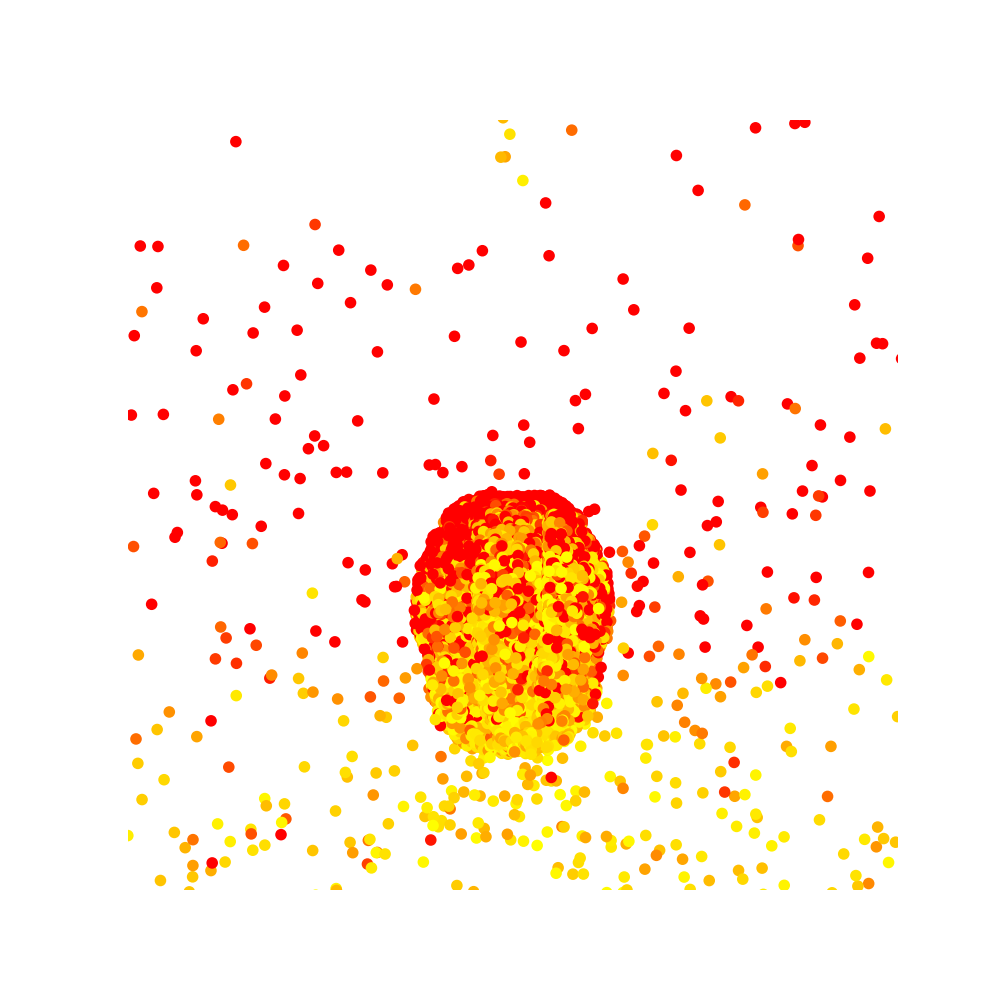

interactive(children=(FloatSlider(value=0.0, description='t', max=132000.0), Output()), _dom_classes=('widget-…

<function __main__.update_plot(t=0)>

In [8]:
df = pd.read_csv('../data/asteroid.raw', delimiter=' ', header=None, names=['x1','y1','z1','x2','y2','z2','time','damage','id'])
times = np.sort(np.array(list(set(df['time'].values))))
dt = np.diff(times)[0]
#print(times)
#print(dt)
print(min(df['x1'].values), max(df['x1'].values))
print(min(df['y1'].values), max(df['y1'].values))

dfUse = df.loc[df['time'].values == times[0]]

fig,ax = plt.subplots(figsize=(5,5))
scat = ax.scatter(dfUse['x1'].values, dfUse['y1'].values, s=10, 
                c=dfUse['damage'].values, cmap='autumn_r', vmin=0.125, vmax = 0.2)
# ax.set_xlim(min(df['x1'].values), max(df['x1'].values))
# ax.set_ylim(min(df['y1'].values), max(df['y1'].values))
ax.set_xlim(-40000, 40000)
ax.set_ylim(-40000, 40000)
ax.set_aspect('equal')
plt.axis('off')


def update_plot(t=0):
    
    tFrac = (t % dt)/dt
    dfUse = df.loc[(df['time'].values >= t) & (df['time'].values < t+dt)]
    x = dfUse['x1'].values + (dfUse['x2'].values - dfUse['x1'].values)*tFrac
    y = dfUse['y1'].values + (dfUse['y2'].values - dfUse['y1'].values)*tFrac
    # Change the colors.
    scat.set_array(dfUse['damage'].values)
    # Change the x,y positions. This expects a _single_ 2xN, 2D array
    scat.set_offsets(np.c_[x,y])
    #fig.canvas.draw()
    return scat,

interact(update_plot, t = widgets.FloatSlider(value=0, min=min(times),max=max(times),step=0.1))



## Some check below

In [ ]:
i=0
f = files[i]
#f = 'grav.000000000.csv'
#f = 'grav.000092000.csv'
df = pd.read_csv(f, header=None, names=['ID','x','y','z','color','damage'])
dfUse = df.sample(frac = 0.1)
print(min(dfUse['damage'].values), max(dfUse['damage'].values))
fig,ax = plt.subplots(figsize=(5,5))
scat = ax.scatter(dfUse['x'].values, dfUse['y'].values, s=2, 
                  c=dfUse['damage'].values, cmap='autumn_r', vmin=0.125, vmax = 0.2)
ax.set_xlim(-20000, 20000)
ax.set_ylim(-25000, 20000)
ax.set_aspect('equal')
ax.axis('off')

In [ ]:
df = pd.read_csv('../data/asteroid.raw', delimiter=' ', header=None, names=['x1','y1','z1','x2','y2','z2','time','damage','id'])

In [ ]:
distance = []
for i, row in df.iterrows():
    d = ((row['x1'] - row['x2'])**2. + (row['y1'] - row['y2'])**2. + (row['z1'] - row['z2'])**2.)**0.5
    distance.append(d)
df = df.assign(distance=distance)


In [ ]:
f,ax = plt.subplots()
ax.hist(df['distance'].values, bins = 1000)
print(max(df['distance'].values))
ax.set_xlim(0,1000)
#ax.set_yscale('log')

In [ ]:
check = df.loc[df['distance'] > 1000]
print(df.size, check.size)

f,ax = plt.subplots()
ax.hist(df['distance'].values, bins = 1000)
ax.set_yscale('log')